In [1]:
import os
import sys
from IPython.display import Image, display
sys.path.append(os.path.abspath("../"))
import eqrender
# display(Image(data=eqrender.latex_to_png2(r'\int\frac{a}{b}', wrap=True)))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pprint import pprint
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

## Transfer function types

The learning properties of a Neural Network would not be so great, with the only help of a univariate linear classifier. Even some mildly complex problem sin machine learning involves multiple non linear variables, so many variants were developed as replacements of the transfer functions of the Perceptron.

In order to represent non linear models, a number of different non linear functions can be used in the activation function. This implies changes in the way the neurons will react to changes in the input variables. In the following sections we will define the main different transfer functions, and will define and represent them via code.

In this section we will start using some Object Oriented Programming of Python to represent entities of the problem domain. It will allow us to represent concepts in a much clear way through the examples.

Let's start by creating a TransferFunction Class, wich will contains two methods: getTransferFunction(x), which will return an activation function determined by the class type, and getTransferFunctionDerivative(x), which will clearly return its derivative. For both functions the input will be a Numpy array, and the function will be applied element by element.

In [3]:
class TransferFunction:
    def getTransferFunction(x):
        raise NotImplementedError
    def getTransferFunctionDerivative(x):
        raise NotImplementedError

## Representing and understanding the transfer functions

In [4]:
def graphTransferFunction(function):
    x = np.arange(-2.0, 2.0, 0.01)
    plt.figure(figsize=(18,8))
    ax=plt.subplot(121)
    ax.set_title(function.__name__)
    plt.plot(x, function.getTransferFunction(x))

    ax=plt.subplot(122)
    ax.set_title('Derivative of ' + function.__name__)
    plt.plot(x, function.getTransferFunctionDerivative(x))

## Sigmoid or Logistic function
It is the canonical activation function, and has very good qualities for calculating probabilities in classification properties. Firstly, lets prepare a function wich will be used to graph all the transfer functions with their derivatives, from a common range of -2.0 to 2.0, with will allow us to see the main characteristics of them around the y axis.
The classical formula for the sigmoid is the following:

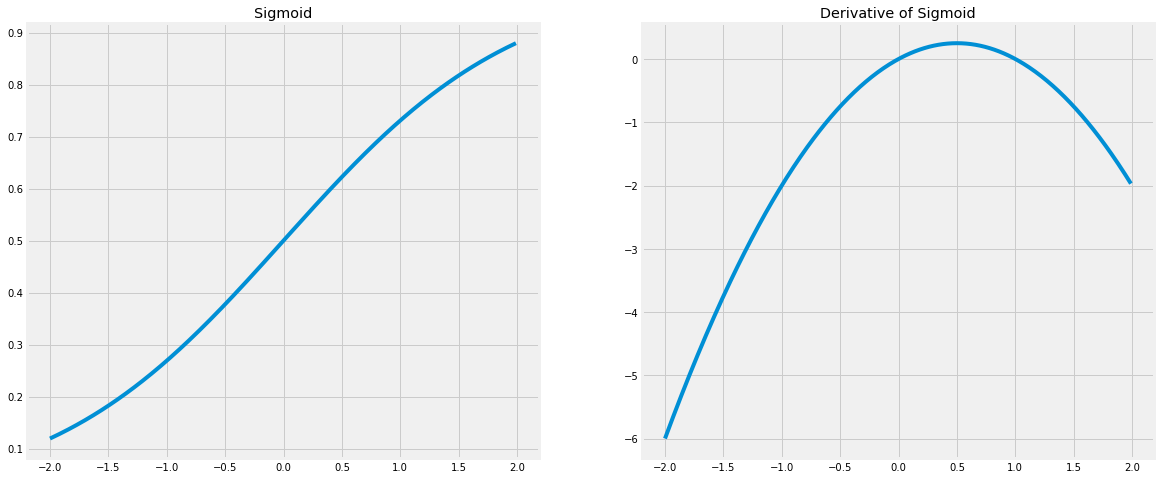

In [5]:
class Sigmoid(TransferFunction):  #Squash 0,1
    def getTransferFunction(x):
        return 1/(1+np.exp(-x))
    def getTransferFunctionDerivative(x):
        return x*(1-x)

graphTransferFunction(Sigmoid)

## Playing with the Sigmoid
Next we will do an exercise to get an intuition on how the Sigmoid changes, when multiplied by the weights, and shifted by the bias, to accomodate the final function towards its minimum. Lets then vary the possible parameters of a single sigmoid first, and see it stretch and move


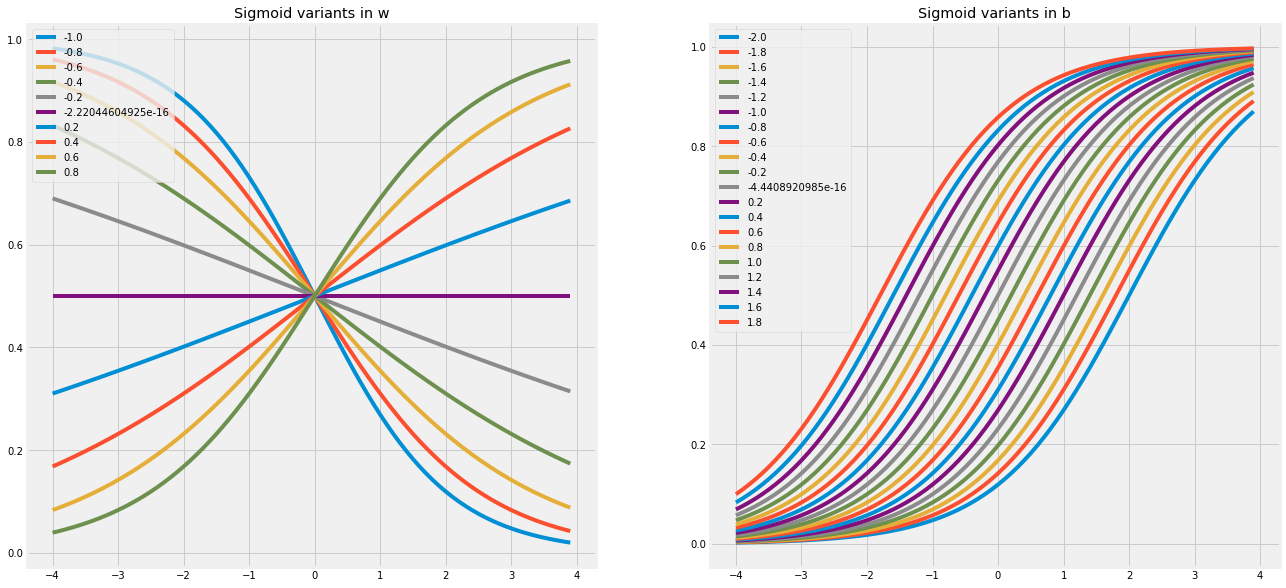

In [6]:
ws=np.arange(-1.0, 1.0, 0.2)
bs=np.arange(-2.0, 2.0, 0.2)
xs=np.arange(-4.0, 4.0, 0.1)
plt.figure(figsize=(20,10))
ax=plt.subplot(121)
for i in ws:
    plt.plot(xs,  Sigmoid.getTransferFunction(i *xs),label= str(i));
ax.set_title('Sigmoid variants in w')
plt.legend(loc='upper left');

ax=plt.subplot(122)
for i in bs:
    plt.plot(xs,  Sigmoid.getTransferFunction(i +xs),label= str(i));
ax.set_title('Sigmoid variants in b')
plt.legend(loc='upper left');

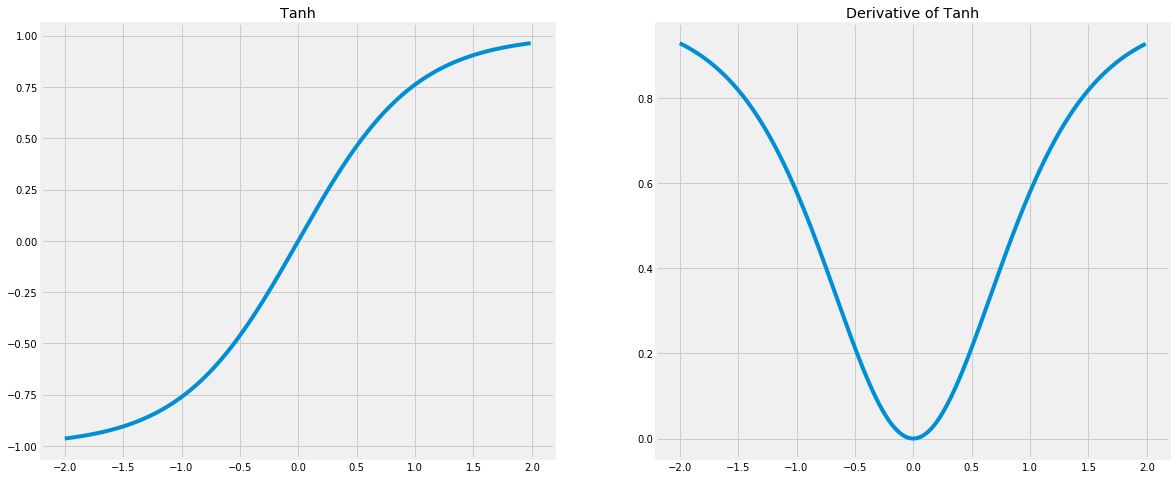

In [7]:
class Tanh(TransferFunction):  #Squash -1,1
    def getTransferFunction(x):
        return np.tanh(x)
    def getTransferFunctionDerivative(x):
        return np.power(np.tanh(x),2)
graphTransferFunction(Tanh)

## Rectified linear unit or Relu
This is called a rectified linear unit, and one of their main advantage is that it is not affected by the Vanishing Gradients problems, which generally consists on the first layers of a network to tend to values of 0 or a tiny epsilon

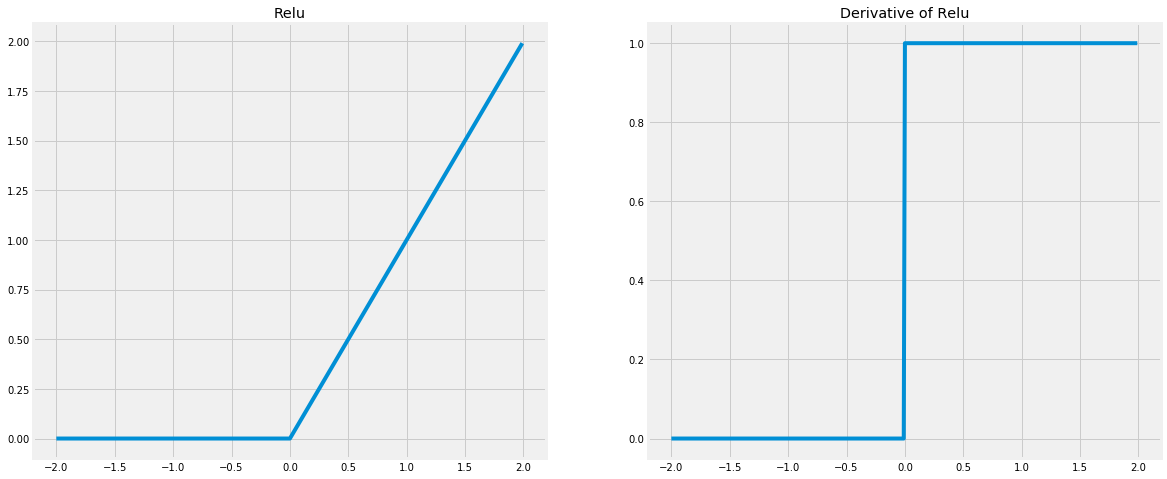

In [8]:
class Relu(TransferFunction):
    def getTransferFunction(x):
        return x * (x>0)
    def getTransferFunctionDerivative(x):
        return 1 * (x>0)
graphTransferFunction(Relu)

## Linear transfer function

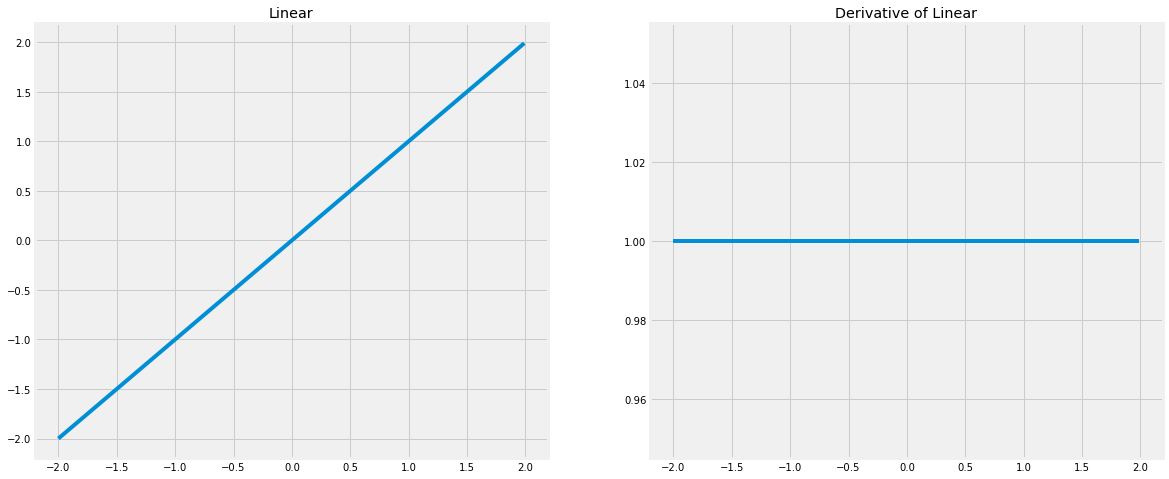

In [9]:
class Linear(TransferFunction):
    def getTransferFunction(x):
        return x
    def getTransferFunctionDerivative(x):
        return np.ones(len(x))
graphTransferFunction(Linear)

## Defining loss functions for Neural Networks
As every model in Machine Learning, we wil explore the possible functions that we will use to determine how well our predictions and classification went. 
The first type of distinction we will do, is between L1 and L2 error function type.

L1, also known as least absolute deviations (LAD) or least absolute errors (LAE), and has very interesting properties, and it simply consist in the absolute difference between the final result of the model, and the expected one:

<img src= "http://www.chioka.in/wp-content/uploads/2013/12/l1-norm-formula.png",width=150,height=150>

L2
<img src="http://www.chioka.in/wp-content/uploads/2013/12/l2-norm-formula.png">

<img src="http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-loss-function.png">


### L1 vs L2 compared properties

#### Robustness
L1 is a more robust loss function, which can be expressed as the resistance of the function to being affected by outliers, which project a quadratic function to very high values. Thus in order to choose an L2 function, we should have a very stringent data clieaning for it to be efficient.

#### Stability
The stability property assesses how much the error curve jumps for a large 
L1 is more unstable, specially for non normalized datasets (because numbers in the [-1, 1] range diminish when squared)

#### Solution uniqueness
As can be infered by its quadratic nature, l2 functions assure that we will have a unique answer for our search for a minimum. L2 always has an unique solution, but l1 can have many of them, due to the facts that we can find many minimun distances ways for our models in the form of piecewise linear functions, compared with the single line distance in the case of L2.

Regarding usage, the summation of the past properties allow us to root ror the normal case we to use the L2 error type, specially because of the solution unicity, which gives us the needed certainty when starting to minimize error values. In the firs example we will start with a simpler L1 error functin, for educational purposes.

Let's explore these two approaches by graphing the error results for a sample L1 and L2 loss error function.
In the next simple example we will show the very different nature of the two errors , in the first two examples we have normalized input (between -1 and 1) and then with values outside that range.
As you can see, from sample 0 to 3, the quadratic error increases steadily but in a continuous way, but with non normalized data, it can explode, specially with outliers, and non normalized data.


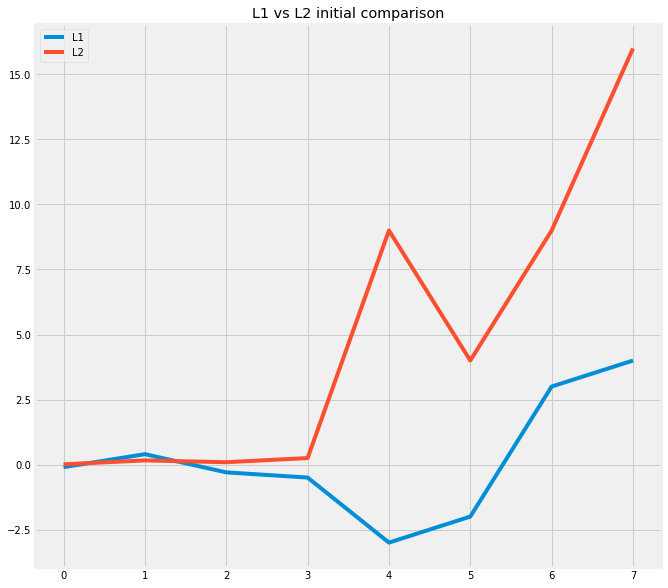

In [10]:
sampley_=np.array([.1,.2,.3,-.4, -1, -3, 6, 3])
sampley=np.array([.2,-.2,.6,.10, 2, -1, 3, -1])

ax.set_title('Sigmoid variants in b')
plt.figure(figsize=(10,10))
ax=plt.subplot()
plt.plot(sampley_ - sampley, label='L1')
plt.plot(np.power((sampley_ - sampley),2), label="L2")
ax.set_title('L1 vs L2 initial comparison')
plt.legend(loc='best')
plt.show()

Lets define the loss functions in the form of a LossFunction class, and a getLoss method, for L1 and L2 loss function types, receiving two NumpyArrays as parameters, y\_, or the estimated function value, and y, the expected value.

In [11]:
class LossFunction:
    def getLoss(y_ , y ):
        raise NotImplementedError
        
class L1(LossFunction):
    def getLoss(y_, y):
        return np.sum (y_ - y)

class L2(LossFunction):
    def getLoss(y_, y):
        return np.sum (np.power((y_ - y),2))


Now it's time to define the goald function, which we will define as a simple boolean one.In order to allow a faster convergency, it will have direct relationship between the first input variable and the function outcome

In [12]:
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

The first model we will use is a very minimal neural network with 3 cells, and a weight for each one, without bias in order to maintain the model complexity at a minimum.

In [13]:
# initialize weights randomly with mean 0
W = 2*np.random.random((3,1)) - 1
print (W)

[[ 0.52014909]
 [-0.25361738]
 [ 0.165037  ]]


Then we will define a set of variables to collect the model error, the weights and training results progression.

In [14]:
errorlist=np.empty(3);
weighthistory=np.array(0)
resultshistory=np.array(0)

Then it's time to do the iterative error minimization. In this case it will consist in feeding 100 times the whole true table via the weights and the neuron's transfer function, adjusting the weights in the direction of the error.
Note that this model does't use a learning rate, so it should converge (or diverge) fast.


In [15]:
for iter in range(100):

    # forward propagation
    l0 = X
    l1 = Sigmoid.getTransferFunction(np.dot(l0,W))
    resultshistory = np.append(resultshistory , l1)

    # Error calculation
    l1_error = y - l1
    errorlist=np.append(errorlist, l1_error)
    
    # Back propagation 1: Get the deltas
    l1_delta = l1_error * Sigmoid.getTransferFunctionDerivative(l1)

    # update weights
    W += np.dot(l0.T,l1_delta)
    weighthistory=np.append(weighthistory,W)


Let's simply review the last evaluation step from printing the output values at l1. Now we can see that we are reflecting quite literally the output of the original function.

In [16]:
print (l1)

[[ 0.11510625]
 [ 0.08929355]
 [ 0.92890033]
 [ 0.90781468]]


To better understand the process, lets have a look at how the parameters change through the time. First let's graph the neuron weights: As you see they go from a random state, to one accepting the whole values of the first column (Which is always right), going to almost 0 for the second column (which is right 50% of the times), and going to -2 for the third (mainly because it as to trigger 0 in the first two elements of the table)

[[ 4.62194116]
 [-0.28222595]
 [-2.04618725]]


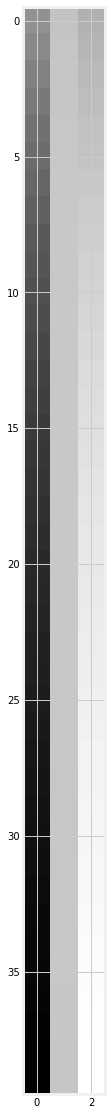

In [17]:
plt.figure(figsize=(20,20))
print (W)
plt.imshow(np.reshape(weighthistory[1:],(-1,3))[:40], cmap=plt.cm.gray_r, interpolation='nearest');

Lets also review how our solutions were evolving (first 40 iterations) until we reached the last one, we can clearly see the convergency to the ideal values.

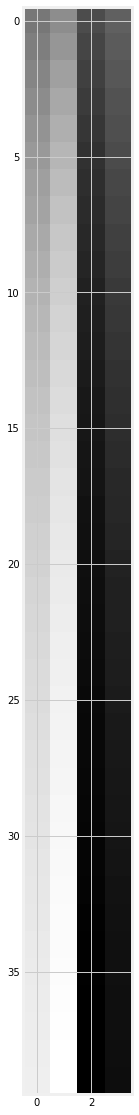

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(np.reshape(resultshistory[1:], (-1,4))[:40], cmap=plt.cm.gray_r, interpolation='nearest');

Then we can see how the errorevolves and tends to zero through the different epoques. In this case we can observe the swinging state of it from negative to positive, having that possibility because we first used an L1 error function.

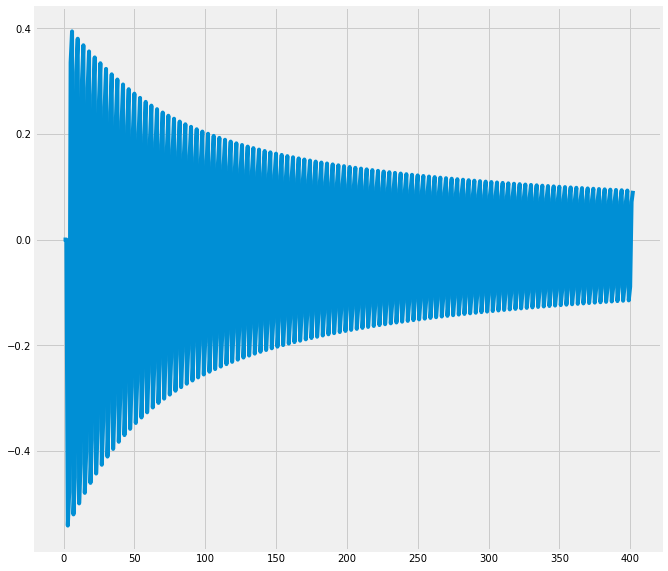

In [19]:
plt.figure(figsize=(10,10))
plt.plot(errorlist);

## Loading the Mnist dataset subset

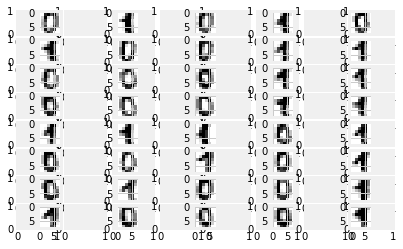

In [20]:
#Load the digits dataset
digits = datasets.load_digits()
#Display the first digit
fig, axs = plt.subplots(nrows=8, ncols=8)
j=1
for i in range(200):
    if (digits.target[i]==0 or digits.target[i]==1):
        axs = fig.add_subplot(8,5,j)
        plt.imshow(digits.images[i]/16, cmap=plt.cm.gray_r, interpolation='nearest')
        j=j+1